# Unsupervised Learning

**Ejemplos:** (Cuando no hay etiquetas)

+ Segmentación de clientes
+ Segmentación de productos
+ One-person segment (lo que funciona bien en un grupo no funciona necesariamente en otro)
+ Agrupación según características

**Escenario**

Cada elemento (usuario, cliente, producto..) puede ser considerado un vector. Dado un paquete de vectores se distribuyen por clusters. Vectores similares estarán en el mismo cluster, y clusters similares estarán más 'cerca' entre si que los que son más diferentes.

Todo éste proceder asume la existencia de una métrica de distancia, así se puede medir dicha distancia entre vectores dentro del espacio vectorial.

**Pasos para aplicar USL:**

+ **1**: Representación vectorial
+ **2**: Métrica, función de distancia
+ **3**: Medida de similitud

Cuando se crea un cluster, el vector en el centro del cluster (centroide) se considera el prototipo o el más representativo del cluster.


**Problemas tratables por USL:**

+ Segmentación de mercado
+ Detección de fraude en seguros o banca
+ Respuesta a tratamientos médicos
+ Detección de outliers

**Ejemplos de modelos:**

+ K-Means
+ Hierarchical Clustering
+ DBSCAN
+ HDBSCAN
+ GMM

# K-Means


El más viejo y el más popular. La idea es seleccionar previamente cuantos clusters se desean ($k$). Se seleccionan los puntos centrales del cluster (centroides) de manera aleatoria. Para cada nuevo registro se reasigna un cluster y se recalcula el centroide (media). Se itera el proceso hasta que no haya cambio en la clusterización.

![](data/kmeans.png)

![](data/kmeans2.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import numpy as np

In [2]:
census=pd.read_csv('data/acs2015_county_data.csv')

census=census.dropna()

census.head()

CensusId    State   County  TotalPop    Men  Women  Hispanic  White  Black  \
0      1001  Alabama  Autauga     55221  26745  28476       2.6   75.8   18.5   
1      1003  Alabama  Baldwin    195121  95314  99807       4.5   83.1    9.5   
2      1005  Alabama  Barbour     26932  14497  12435       4.6   46.2   46.7   
3      1007  Alabama     Bibb     22604  12073  10531       2.2   74.5   21.4   
4      1009  Alabama   Blount     57710  28512  29198       8.6   87.9    1.5   

   Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
0     0.4  ...   0.5          1.3         1.8         26.5     23986   
1     0.6  ...   1.0          1.4         3.9         26.4     85953   
2     0.2  ...   1.8          1.5         1.6         24.1      8597   
3     0.4  ...   0.6          1.5         0.7         28.8      8294   
4     0.3  ...   0.9          0.4         2.3         34.9     22189   

   PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0         73.6        20.9           5.5         0.0           7.6  
1         81.5        12.3           5.8         0.4           7.5  
2         71.8        20.8           7.3         0.1          17.6  
3         76.8        16.1           6.7         0.4           8.3  
4         82.0        13.5           4.2         0.4           7.7  

[5 rows x 37 columns]

In [3]:
cols=[c for c in census.columns.values if c not in ['CensusId', 'State', 'County']]

In [4]:
# K-Means

from sklearn.cluster import KMeans

In [5]:
kmeans=KMeans(n_clusters=4)

In [6]:
clusters=kmeans.fit(census[cols])  # entrenamiento con columnas seleccionadas

In [7]:
len(clusters.cluster_centers_)

4

In [8]:
clusters.cluster_centers_

array([[4.91636213e+04, 2.43276000e+04, 2.48360213e+04, 1.05735632e+01,
        7.64456486e+01, 8.37155993e+00, 1.79891626e+00, 9.33431856e-01,
        6.59113300e-02, 3.63820558e+04, 4.52640923e+04, 2.96395468e+03,
        2.35384269e+04, 1.41439048e+03, 1.76698851e+01, 2.44180296e+01,
        3.05360263e+01, 1.83735304e+01, 2.20772085e+01, 1.29872250e+01,
        1.60262726e+01, 7.94217077e+01, 1.03420033e+01, 6.63908046e-01,
        3.34440066e+00, 1.59431856e+00, 4.63448276e+00, 2.30822660e+01,
        2.17587507e+04, 7.38585878e+01, 1.77766174e+01, 8.06781609e+00,
        2.96748768e-01, 8.08042693e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [9]:
preds=clusters.fit_predict(census[cols])
preds[10:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

In [10]:
distancias=clusters.fit_transform(census[cols])

len(distancias)

3218

In [11]:
census[cols].shape

(3218, 34)

In [12]:
distancias[0]

array([3.69620918e+06, 1.08771054e+04, 9.96438206e+05, 1.43820788e+07])

In [13]:
distancias[np.where(preds==1)[0]]  # distancias para cluster 1

array([[ 2106406.00976323,  5809503.89979835,  4804605.31745871,
         8588496.98197191],
       [  772570.30820241,  4475286.97640161,  3470957.88908917,
         9917118.44212282],
       [  513144.88932824,  3214056.93876303,  2211780.64503106,
        11180977.9607949 ],
       [  803143.61151026,  2916768.67305135,  1915071.10096707,
        11478171.47094131],
       [  949401.92658742,  4649578.65598336,  3644726.06456511,
         9747031.09016275],
       [ 1071684.93830065,  2638966.3041424 ,  1636262.80140573,
        11753365.28587231],
       [ 1068460.78265703,  2637934.82275924,  1633155.31804387,
        11754836.98165016],
       [  142440.43241204,  3697275.8797743 ,  2695633.70843222,
        10694584.7804203 ],
       [ 3934192.92636933,  7637613.22809512,  6632496.86110559,
         6766975.69819643],
       [ 1178691.48062282,  2551761.67223661,  1550150.83149654,
        11853030.30945281],
       [  811324.81306603,  2895275.90862036,  1890837.41503965,
     

In [14]:
census['cluster']=preds
census.head()

CensusId    State   County  TotalPop    Men  Women  Hispanic  White  Black  \
0      1001  Alabama  Autauga     55221  26745  28476       2.6   75.8   18.5   
1      1003  Alabama  Baldwin    195121  95314  99807       4.5   83.1    9.5   
2      1005  Alabama  Barbour     26932  14497  12435       4.6   46.2   46.7   
3      1007  Alabama     Bibb     22604  12073  10531       2.2   74.5   21.4   
4      1009  Alabama   Blount     57710  28512  29198       8.6   87.9    1.5   

   Native  ...  OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
0     0.4  ...          1.3         1.8         26.5     23986         73.6   
1     0.6  ...          1.4         3.9         26.4     85953         81.5   
2     0.2  ...          1.5         1.6         24.1      8597         71.8   
3     0.4  ...          1.5         0.7         28.8      8294         76.8   
4     0.3  ...          0.4         2.3         34.9     22189         82.0   

   PublicWork  SelfEmployed  FamilyWork  Unemployment  cluster  
0        20.9           5.5         0.0           7.6        0  
1        12.3           5.8         0.4           7.5        0  
2        20.8           7.3         0.1          17.6        0  
3        16.1           6.7         0.4           8.3        0  
4        13.5           4.2         0.4           7.7        0  

[5 rows x 38 columns]

In [15]:
census.cluster.unique()

array([0, 3, 1, 2])

In [16]:
census[census.cluster==1] # datos del cluster 1

CensusId       State          County  TotalPop      Men    Women  \
103       4013     Arizona        Maricopa   4018143  1986158  2031985   
215       6059  California          Orange   3116069  1539600  1576469   
218       6065  California       Riverside   2298032  1143477  1154555   
221       6071  California  San Bernardino   2094769  1042053  1052716   
222       6073  California       San Diego   3223096  1618945  1604151   
228       6085  California     Santa Clara   1868149   939004   929145   
325      12011     Florida         Broward   1843152   894820   948332   
362      12086     Florida      Miami-Dade   2639042  1280221  1358821   
610      17031    Illinois            Cook   5236393  2537245  2699148   
1312     26163    Michigan           Wayne   1778969   855112   923857   
1748     32003      Nevada           Clark   2035572  1019927  1015645   
1851     36047    New York           Kings   2595259  1229001  1366258   
1858     36061    New York        New York   1629507   769434   860073   
1868     36081    New York          Queens   2301139  1115459  1185680   
2537     48029       Texas           Bexar   1825502   897690   927812   
2579     48113       Texas          Dallas   2485003  1225722  1259281   
2623     48201       Texas          Harris   4356362  2166727  2189635   
2742     48439       Texas         Tarrant   1914526   937266   977260   
2969     53033  Washington            King   2045756  1020901  1024855   

      Hispanic  White  Black  Native  ...  OtherTransp  WorkAtHome  \
103       30.1   57.3    4.9     1.6  ...          2.6         5.9   
215       34.2   42.4    1.5     0.2  ...          2.1         5.2   
218       47.0   37.8    5.9     0.4  ...          1.6         5.2   
221       51.1   31.2    8.1     0.4  ...          1.2         4.2   
222       32.9   47.0    4.7     0.4  ...          2.0         6.8   
228       26.6   33.6    2.4     0.2  ...          3.2         4.6   
325       27.0   40.4   26.9     0.2  ...          2.0         4.9   
362       65.6   15.1   16.8     0.1  ...          1.9         4.3   
610       24.7   43.1   23.7     0.1  ...          2.2         4.2   
1312       5.5   49.8   39.2     0.3  ...          1.5         2.8   
1748      30.0   45.8   10.4     0.4  ...          2.2         3.1   
1851      19.6   35.7   31.2     0.2  ...          2.5         3.9   
1858      25.8   47.1   12.7     0.1  ...          5.4         6.8   
1868      27.9   26.1   17.4     0.2  ...          1.5         2.4   
2537      59.1   29.3    7.1     0.2  ...          1.2         4.0   
2579      39.0   31.5   21.8     0.2  ...          2.1         4.1   
2623      41.6   31.7   18.5     0.2  ...          2.0         3.3   
2742      27.6   49.8   15.1     0.3  ...          1.4         3.9   
2969       9.3   62.8    6.0     0.6  ...          2.8         6.1   

      MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  \
103          25.5   1821038         82.5        11.7           5.7   
215          26.8   1508753         81.8        10.2           7.8   
218          32.4    920603         77.1        14.9           7.8   
221          30.4    829145         76.4        16.7           6.7   
222          25.0   1462130         77.3        14.8           7.7   
228          26.3    915619         84.3         9.3           6.4   
325          27.8    890997         82.2        11.3           6.4   
362          29.9   1204871         81.9        10.2           7.7   
610          32.3   2463655         83.9        11.5           4.5   
1312         25.1    696900         86.1        10.0           3.8   
1748         24.4    923588         84.5        10.7           4.8   
1851         41.7   1167448         79.1        14.4           6.5   
1858         31.1    884457         83.6         8.5           7.8   
1868         42.6   1104930         79.9        13.6           6.4   
2537         24.5    824123         79.6        14.8           5.6   
2579

In [17]:
census[census.cluster==3] # datos del cluster 3

CensusId       State     County  TotalPop     Men   Women  Hispanic  \
36        1073     Alabama  Jefferson    659026  311581  347445       3.8   
48        1097     Alabama     Mobile    414251  198216  216035       2.6   
106       4019     Arizona       Pima    998537  491108  507429      35.7   
170       5119    Arkansas    Pulaski    390463  187292  203171       5.9   
186       6001  California    Alameda   1584983  776699  808284      22.6   
...        ...         ...        ...       ...     ...     ...       ...   
2983     53061  Washington  Snohomish    746653  374847  371806       9.5   
2984     53063  Washington    Spokane    480832  238241  242591       5.1   
3059     55025   Wisconsin       Dane    510198  252850  257348       6.2   
3087     55079   Wisconsin  Milwaukee    955939  461804  494135      14.0   
3114     55133   Wisconsin   Waukesha    393873  193441  200432       4.5   

      White  Black  Native  ...  OtherTransp  WorkAtHome  MeanCommute  \
36     51.0   42.2     0.2  ...          1.0         2.5         23.6   
48     58.1   35.0     0.6  ...          0.8         3.7         24.4   
106    53.7    3.3     2.4  ...          3.7         4.6         24.4   
170    54.2   35.4     0.3  ...          1.1         2.9         20.3   
186    33.0   11.3     0.3  ...          3.5         5.6         30.7   
...     ...    ...     ...  ...          ...         ...          ...   
2983   72.5    2.5     0.9  ...          1.6         5.1         30.6   
2984   85.7    1.7     1.3  ...          1.6         5.4         21.2   
3059   80.8    5.0     0.2  ...          3.5         4.6         21.0   
3087   53.2   26.1     0.5  ...          1.5         3.0         22.5   
3114   89.6    1.4     0.1  ...          0.9         4.2         24.0   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
36      293202         80.9        14.4           4.6         0.2   
48      170900         81.4        13.8           4.6         0.1   
106     422371         74.9        18.3           6.6         0.2   
170     180430         74.6        20.6           4.7         0.2   
186     778132         78.7        13.8           7.4         0.1   
...        ...          ...         ...           ...         ...   
2983    367655         81.6        12.7           5.5         0.2   
2984    211522         78.4        15.5           6.0         0.2   
3059    287151         74.2        21.1           4.5         0.1   
3087    445174         84.8        11.7           3.4         0.1   
3114    209461         87.4         8.3           4.2         0.1   

      Unemployment  cluster  
36             9.1        3  
48             9.8        3  
106           10.0        3  
170            7.5        3  
186            8.3        3  
...            ...      ...  
2983           7.5        3  
2984           8.4        3  
3059           4.9        3  
3087           9.3        3  
3114           4.2        3  

[158 rows x 38 columns]

In [18]:
census[census.cluster==2].State.value_counts()

California    1
Name: State, dtype: int64

In [19]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3219
Data columns (total 38 columns):
CensusId           3218 non-null int64
State              3218 non-null object
County             3218 non-null object
TotalPop           3218 non-null int64
Men                3218 non-null int64
Women              3218 non-null int64
Hispanic           3218 non-null float64
White              3218 non-null float64
Black              3218 non-null float64
Native             3218 non-null float64
Asian              3218 non-null float64
Pacific            3218 non-null float64
Citizen            3218 non-null int64
Income             3218 non-null float64
IncomeErr          3218 non-null float64
IncomePerCap       3218 non-null int64
IncomePerCapErr    3218 non-null int64
Poverty            3218 non-null float64
ChildPoverty       3218 non-null float64
Professional       3218 non-null float64
Service            3218 non-null float64
Office             3218 non-null float64
Constru

In [20]:
census.groupby(['cluster'])['Income'].mean() # media de ingreso por cluster

cluster
0    45258.590132
1    58589.894737
2    56196.000000
3    61204.303797
Name: Income, dtype: float64

In [21]:
census.groupby(['cluster'])['TotalPop'].mean() # media de poblacion por cluster

cluster
0    4.861377e+04
1    2.594971e+06
2    1.003839e+07
3    7.149950e+05
Name: TotalPop, dtype: float64

In [22]:
census.groupby(['cluster'])['SelfEmployed'].mean()  # media de autoempleo por cluster

cluster
0    8.070987
1    6.284211
2    9.400000
3    5.463924
Name: SelfEmployed, dtype: float64

In [23]:
census.groupby(['cluster'])['Employed'].mean()  # media de empleo por cluster

cluster
0    2.150655e+04
1    1.205076e+06
2    4.635465e+06
3    3.411340e+05
Name: Employed, dtype: float64

##### plot 2D K-Means


In [24]:
np.set_printoptions(precision=5, suppress=True)

np.random.seed(4711)

a=np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[100,])
b=np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[50,])

In [25]:
X=np.concatenate((a,b),)
X.shape

(150, 2)

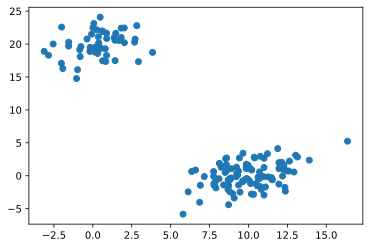

In [26]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [27]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(X)

In [28]:
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

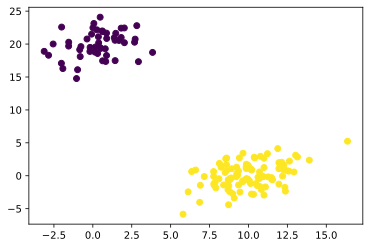

In [29]:
plt.scatter(X[:,0], X[:,1], c=clusters.fit_predict(X))
plt.show();

# Hierarchical Clustering (Dendrograma)

La mejora sobre K-Means es fundamentalmente que no hay que asumir el número de clusters.

Hay dos maneras de atacar éste problema:

+ Por aglomeración
+ Por división

**Aglomeración:**

Se empieza asumiendo que cada registro es un cluster individual y se van combinando aquellos similares hasta conseguir un solo cluster, la población entera. Después se decide el número óptimo de clusters según la distancia.




**División:**

El proceso inverso. Se comienza con un solo cluster y se va dividiendo hasta tener el número óptimo de clusters (según distancia).


![](data/hca.png)

##### Medidas de distancia

Aquí también entra la distancia, para medir entre registros/clusters. Normalmente, se usa la distancia euclídea. El uso de la métrica de distancia depende del problema en cuestión, por ejemplo, en una clusterización de lugares en la ciudad, podría ser mejor usar $cityblock$, o incluso tomar el tiempo que hay entre dos lugares (tiempo como métrica de distancia).

##### Criterios de conexión (linkage criteria)

Después de seleccionar la métrica de distancia, hay que decidir de qué manera se conectan los registros al cluster. Puede ser:

+ Single-linkage: conexión entre los puntos más parecidos del cluster.
+ Complete-linkage: conexión entre los puntos menos parecidos del cluster.
+ Average-linkage: conexión entre los centroides del cluster.


![](data/link.png)

Al igual que la métrica de distancia, la elección del criterio de conexión ha de basarse en el propio problema. Por ejemplo, para clasificar varias tecnologías diferentes tendría sentido basarse en cuales son más parecidos. Si no existen justificaciones claras de cual usar, se suele usar el criterio de Ward, que viene a ser mínimos cuadrados de las distancias, respecto de la media del cluster. Esto concuerda con el concepto de distancia entre grupos en estadística (ANOVA, MANOVA....)

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Ward

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [31]:
#help(linkage)

In [32]:
# Matriz de conexion

Z=linkage(X, 'ward')

Z.shape

(149, 4)

In [33]:
Z[0]  # idx1, idx2, distancia, sample_count

array([52.     , 53.     ,  0.04151,  2.     ])

In [34]:
Z[3]

array([17.     , 73.     ,  0.07137,  2.     ])

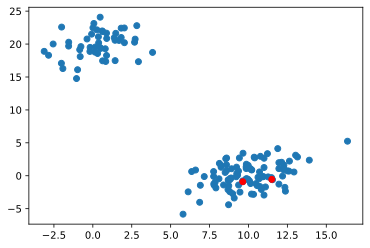

In [35]:
idxs=[17, 63]

plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
plt.show();

##### dendrograma

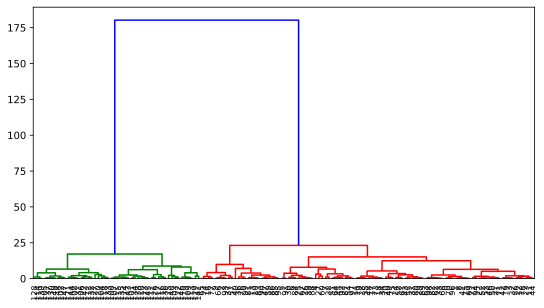

In [36]:
plt.figure(figsize=(9, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

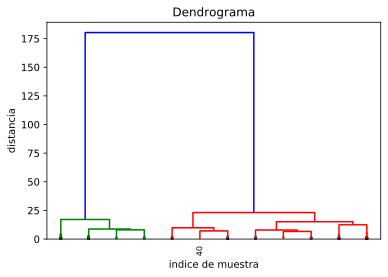

In [37]:
dendrogram(Z, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=False)
plt.title('Dendrograma')
plt.xlabel('indice de muestra')
plt.ylabel('distancia')

plt.show();

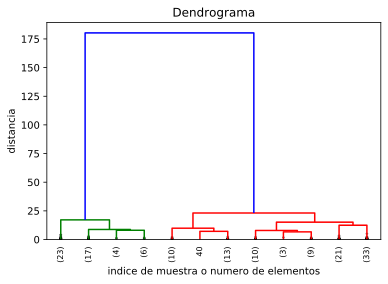

In [38]:
dendrogram(Z, truncate_mode='lastp', p=12,
           leaf_rotation=90., leaf_font_size=8.,
           show_contracted=True, show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('indice de muestra o numero de elementos')
plt.ylabel('distancia')

plt.show();

In [39]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata
    
    

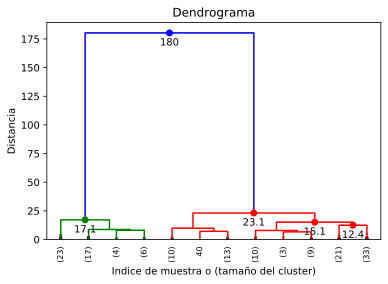

In [40]:
fancy_dendro(Z, truncate_mode='lastp', p=12,
                 leaf_rotation=90., leaf_font_size=8.,
                 show_contracted=True, annotate_above=10)

plt.show();

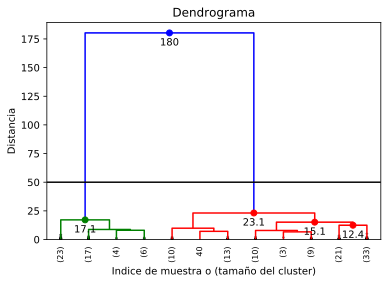

In [41]:
fancy_dendro(Z, truncate_mode='lastp', p=12,
                 leaf_rotation=90., leaf_font_size=8.,
                 show_contracted=True, annotate_above=10, max_d=50)

plt.show();

##### obteniendo clusters

In [42]:
from scipy.cluster.hierarchy import fcluster

In [43]:
max_d=50
clusters=fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [44]:
# conociendo k...
k=2
clusters_max=fcluster(Z, k, criterion='maxclust')
clusters_max

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

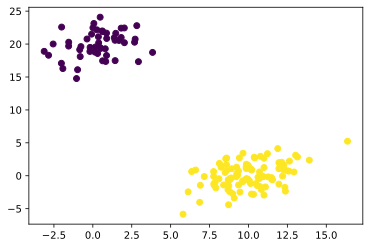

In [45]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show();

# K-Means VS Hierarchical

In [46]:
from sklearn.datasets import make_moons

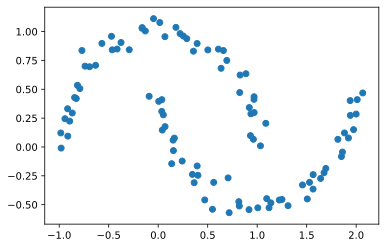

In [47]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)[0]

plt.scatter(moons[:,0], moons[:,1]);

In [48]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

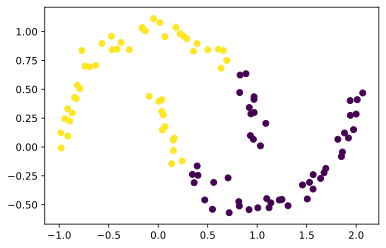

In [49]:
cluster=KMeans(n_clusters=2).fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

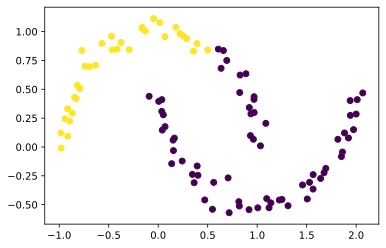

In [50]:
cluster=AC().fit(moons)  # 2 clusters , ward por defecto

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

In [51]:
AC()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

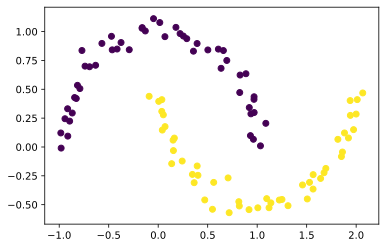

In [52]:
cluster=AC(linkage='single').fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

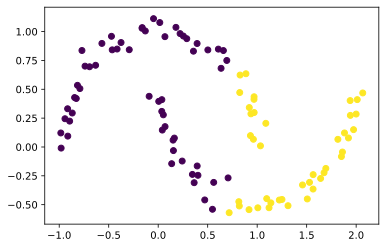

In [53]:
cluster=AC(linkage='average').fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);

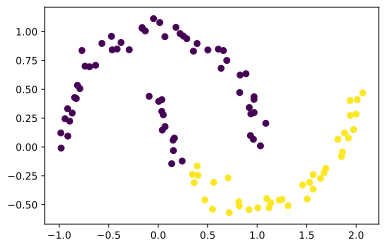

In [54]:
cluster=AC(linkage='complete').fit(moons)

plt.scatter(moons[:,0], moons[:,1], c=cluster.labels_);